<a name="table_of_contents"></a>
# Content: 

1) [Winter is Coming. Let's load the dataset ASAP!](#stage_1)

* [Loading libraries and dataset.](#s_1)

    * [Dataset preview: Book 1](#s_2)

    * [Dataset preview: Book 2](#s_3)

    * [Dataset preview: Book 3](#s_4)

    * [Dataset preview: Book 4](#s_5)

    * [Dataset preview: Book 5](#s_6)

2) [Time for some Network of Thrones](#stage_2)

3) [Populate the network with the DataFrame](#stage_3)

4) [The most important character in Game of Thrones](#stage_4)

5) [The evolution of character importance](#stage_5)

6) [What's up with Stannis Baratheon?](#stage_6)

7) [What does Google PageRank tell us about GoT?](#stage_7)

8) [Correlation between different measures](#stage_8)

9) [Conclusion](#stage_9)

<a name="stage_1"></a>
## 1. Winter is Coming. Let's load the dataset ASAP!
[To the table of contents](#table_of_contents)
<p>If you haven't heard of <em>Game of Thrones</em>, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series <em>A Song of Ice and Fire</em> by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the  Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books. </p>
<p><img src="https://assets.datacamp.com/production/project_76/img/got_network.jpeg" style="width: 550px"></p>
<p>This dataset constitutes a network and is given as a text file describing the <em>edges</em> between characters, with some attributes attached to each edge. Let's start by loading in the data for the first book <em>A Game of Thrones</em> and inspect it.</p>

<a name="s_1"></a>
### Loading libraries and dataset.
[To the table of contents](#table_of_contents)

In [1]:
! pip install missingno


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
book1 = pd.read_csv('book1.csv')
book2 = pd.read_csv('book2.csv')
book3 = pd.read_csv('book3.csv')
book4 = pd.read_csv('book4.csv')
book5 = pd.read_csv('book5.csv')

<a name="s_2"></a>
### Dataset preview: Book 1
[To the table of contents](#table_of_contents)

In [3]:
book1.head(5)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [4]:
print(book1.shape)
print('\n----------------------------')
book1.info()

(684, 5)

----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  684 non-null    object
 1   Target  684 non-null    object
 2   Type    684 non-null    object
 3   weight  684 non-null    int64 
 4   book    684 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [5]:
book1.describe()

,weight,book
count,684.000000,684.0
mean,10.769006,1.0
std,17.294432,0.0
min,3.000000,1.0
25%,4.000000,1.0
50%,5.000000,1.0
75%,11.000000,1.0
max,291.000000,1.0


In [6]:
print('Duplicates in the dataset :', book1.duplicated().sum())
print('\nMissing values in the dataset:', book1.isna().sum())

Duplicates in the dataset : 0

Missing values in the dataset: Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64


<a name="s_3"></a>
### Dataset preview: Book 2
[To the table of contents](#table_of_contents)

In [7]:
book2.head(5)

,Source,Target,Type,weight,book
0,Aegon-I-Targaryen,Harren-Hoare,Undirected,4,2.0
1,Aegon-I-Targaryen,Nan,Undirected,3,2.0
2,Aegon-I-Targaryen,Rhaenys-Targaryen,Undirected,4,2.0
3,Aegon-I-Targaryen,Tyrion-Lannister,Undirected,3,2.0
4,Aegon-I-Targaryen,Visenya-Targaryen,Undirected,3,2.0


In [8]:
print(book2.shape)
print('\n----------------------------')
book2.info()

(775, 5)

----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  775 non-null    object 
 1   Target  775 non-null    object 
 2   Type    775 non-null    object 
 3   weight  775 non-null    int64  
 4   book    774 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 30.4+ KB


In [9]:
book2.describe()

,weight,book
count,775.000000,774.0
mean,8.206452,2.0
std,10.179968,0.0
min,3.000000,2.0
25%,3.000000,2.0
50%,5.000000,2.0
75%,8.000000,2.0
max,92.000000,2.0


In [10]:
print('Duplicates in the dataset :', book2.duplicated().sum())
print('\nMissing values in the dataset:', book2.isna().sum())

Duplicates in the dataset : 0

Missing values in the dataset: Source    0
Target    0
Type      0
weight    0
book      1
dtype: int64


<a name="s_4"></a>
### Dataset preview: Book 3
[To the table of contents](#table_of_contents)

In [11]:
book3.head(5)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Gyles-Rosby,Undirected,3,3
1,Addam-Marbrand,Jaime-Lannister,Undirected,3,3
2,Addam-Marbrand,Jalabhar-Xho,Undirected,3,3
3,Addam-Marbrand,Joffrey-Baratheon,Undirected,3,3
4,Addam-Marbrand,Kevan-Lannister,Undirected,3,3


In [12]:
print(book3.shape)
print('\n----------------------------')
book3.info()

(1008, 5)

----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  1008 non-null   object
 1   Target  1008 non-null   object
 2   Type    1008 non-null   object
 3   weight  1008 non-null   int64 
 4   book    1008 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.5+ KB


In [13]:
book3.describe()

,weight,book
count,1008.000000,1008.0
mean,8.409722,3.0
std,9.755898,0.0
min,3.000000,3.0
25%,3.000000,3.0
50%,5.000000,3.0
75%,9.000000,3.0
max,95.000000,3.0


In [14]:
print('Duplicates in the dataset :', book3.duplicated().sum())
print('\nMissing values in the dataset:', book3.isna().sum())

Duplicates in the dataset : 0

Missing values in the dataset: Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64


<a name="s_5"></a>
### Dataset preview: Book 4
[To the table of contents](#table_of_contents)

In [15]:
book4.head(5)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Brynden-Tully,undirected,3,4
1,Addam-Marbrand,Cersei-Lannister,undirected,3,4
2,Addam-Marbrand,Jaime-Lannister,undirected,8,4
3,Addam-Marbrand,Lyle-Crakehall,undirected,4,4
4,Aegon-Targaryen-(son-of-Rhaegar),Rhaegar-Targaryen,undirected,3,4


In [16]:
print(book4.shape)
print('\n----------------------------')
book4.info()

(682, 5)

----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  682 non-null    object
 1   Target  682 non-null    object
 2   Type    682 non-null    object
 3   weight  682 non-null    int64 
 4   book    682 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [17]:
book4.describe()

,weight,book
count,682.000000,682.0
mean,6.916422,4.0
std,7.175607,0.0
min,3.000000,4.0
25%,3.000000,4.0
50%,4.000000,4.0
75%,7.000000,4.0
max,80.000000,4.0


In [18]:
print('Duplicates in the dataset :', book4.duplicated().sum())
print('\nMissing values in the dataset:', book4.isna().sum())

Duplicates in the dataset : 0

Missing values in the dataset: Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64


<a name="s_6"></a>
### Dataset preview: Book 5
[To the table of contents](#table_of_contents)

In [19]:
book5.head(5)

,Source,Target,Type,weight,book
0,Aegon-I-Targaryen,Daenerys-Targaryen,undirected,4,5
1,Aegon-Targaryen-(son-of-Rhaegar),Daenerys-Targaryen,undirected,11,5
2,Aegon-Targaryen-(son-of-Rhaegar),Elia-Martell,undirected,4,5
3,Aegon-Targaryen-(son-of-Rhaegar),Franklyn-Flowers,undirected,3,5
4,Aegon-Targaryen-(son-of-Rhaegar),Haldon,undirected,14,5


In [20]:
print(book5.shape)
print('\n----------------------------')
book5.info()

(760, 5)

----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  760 non-null    object
 1   Target  760 non-null    object
 2   Type    760 non-null    object
 3   weight  760 non-null    int64 
 4   book    760 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 29.8+ KB


In [21]:
book5.describe()

,weight,book
count,760.000000,760.0
mean,7.511842,5.0
std,9.204448,0.0
min,3.000000,5.0
25%,3.000000,5.0
50%,4.000000,5.0
75%,8.000000,5.0
max,96.000000,5.0


In [22]:
print('Duplicates in the dataset :', book5.duplicated().sum())
print('\nMissing values in the dataset:', book5.isna().sum())

Duplicates in the dataset : 0

Missing values in the dataset: Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64


<a name="stage_2"></a>
## 2. Time for some Network of Thrones
[To the table of contents](#table_of_contents)
<p>The resulting DataFrame <code>book1</code> has 5 columns: <code>Source</code>, <code>Target</code>, <code>Type</code>, <code>weight</code>, and <code>book</code>. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.</p>
<p>Once we have the data loaded as a pandas DataFrame, it's time to create a network. We will use <code>networkx</code>, a network analysis library, and create a graph object for the first book.</p>

In [23]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

<a name="stage_3"></a>
## 3. Populate the network with the DataFrame
[To the table of contents](#table_of_contents)
<p>Currently, the graph object <code>G_book1</code> is empty. Let's now populate it with the edges from <code>book1</code>. And while we're at it, let's load in the rest of the books too!</p>

In [24]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

##### Let's look at all the characters in the books to see if the loop worked.

In [25]:
print(books[0].nodes)

['Addam-Marbrand', 'Jaime-Lannister', 'Tywin-Lannister', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Eddard-Stark', 'Aemon-Targaryen-(Maester-Aemon)', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Jeor-Mormont', 'Jon-Snow', 'Samwell-Tarly', 'Aerys-II-Targaryen', 'Brandon-Stark', 'Gerold-Hightower', 'Jon-Arryn', 'Robert-Baratheon', 'Aggo', 'Drogo', 'Jhogo', 'Jorah-Mormont', 'Quaro', 'Rakharo', 'Albett', 'Halder', 'Rast', 'Grenn', 'Pypar', 'Tyrion-Lannister', 'Alyn', 'Harwin', 'Jory-Cassel', 'Tomard', 'Arthur-Dayne', 'Arya-Stark', 'Benjen-Stark', 'Bran-Stark', 'Catelyn-Stark', 'Cersei-Lannister', 'Desmond', 'Ilyn-Payne', 'Jeyne-Poole', 'Joffrey-Baratheon', 'Meryn-Trant', 'Mordane', 'Mycah', 'Myrcella-Baratheon', 'Petyr-Baelish', 'Rickon-Stark', 'Robb-Stark', 'Rodrik-Cassel', 'Sandor-Clegane', 'Sansa-Stark', 'Syrio-Forel', 'Tommen-Baratheon', 'Vayon-Poole', 'Yoren', 'Arys-Oakheart', 'Balon-Greyjoy', 'Balon-Swann', 'Renly-Baratheon', 'Barristan-Selmy', 'Boros-Blount', 'Pycelle', 'Va

In [26]:
print(books[4].nodes)

['Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Aegon-Targaryen-(son-of-Rhaegar)', 'Elia-Martell', 'Franklyn-Flowers', 'Haldon', 'Harry-Strickland', 'Jon-Connington', 'Lemore', 'Rhaegar-Targaryen', 'Rhaenys-Targaryen-(daughter-of-Rhaegar)', 'Rolly-Duckfield', 'Tyrion-Lannister', 'Tywin-Lannister', 'Viserys-Targaryen', 'Yandry', 'Ysilla', 'Aemon-Targaryen-(Maester-Aemon)', 'Clydas', 'Gilly', 'Jon-Snow', 'Samwell-Tarly', 'Stannis-Baratheon', 'Aenys-Frey', 'Hosteen-Frey', 'Theon-Greyjoy', 'Wyman-Manderly', 'Aeron-Greyjoy', 'Euron-Greyjoy', 'Victarion-Greyjoy', 'Aerys-II-Targaryen', 'Robert-Baratheon', 'Aggo', 'Barristan-Selmy', 'Daario-Naharis', 'Grey-Worm', 'Jhogo', 'Rakharo', 'Alliser-Thorne', 'Alys-Karstark', 'Melisandre', 'Sigorn', 'Alysane-Mormont', 'Asha-Greyjoy', 'Justin-Massey', 'Archibald-Yronwood', 'Cletus-Yronwood', 'Gerris-Drinkwater', 'Quentyn-Martell', 'Tattered-Prince', 'Areo-Hotah', 'Arianne-Martell', 'Arys-Oakheart', 'Balon-Swann', 'Doran-Martell', 'Ellaria-Sand', 'Obara-San

<a name="stage_4"></a>
## 4. The most important character in Game of Thrones
[To the table of contents](#table_of_contents)
<p>Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network science offers us many different metrics to measure the importance of a node in a network. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.</p>
<p>First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called <em>degree centrality</em>.</p>
<p>Using this measure, let's extract the top ten important characters from the first book (<code>book[0]</code>) and the fifth book (<code>book[4]</code>).</p>

In [27]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book2 = nx.degree_centrality(books[1])

# Calculating the degree centrality of book 5
deg_cen_book3 = nx.degree_centrality(books[2])

# Calculating the degree centrality of book 5
deg_cen_book4 = nx.degree_centrality(books[3])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book2 = sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book3 = sorted(deg_cen_book3.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book4 = sorted(deg_cen_book4.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]
# Printing out the top 10 of book1 and book5
print('\nTop 10 in First book:', sorted_deg_cen_book1)
print('\nTop 10 in Second book:', sorted_deg_cen_book2)
print('\nTop 10 in Third book:', sorted_deg_cen_book3)
print('\nTop 10 in Fourth book:', sorted_deg_cen_book4)
print('\nTop 10 in Fifth book:', sorted_deg_cen_book5)


Top 10 in First book: [('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]

Top 10 in Second book: [('Tyrion-Lannister', 0.2054263565891473), ('Joffrey-Baratheon', 0.1821705426356589), ('Cersei-Lannister', 0.16666666666666666), ('Arya-Stark', 0.15503875968992248), ('Stannis-Baratheon', 0.1434108527131783), ('Robb-Stark', 0.13565891472868216), ('Catelyn-Stark', 0.12790697674418605), ('Theon-Greyjoy', 0.12403100775193798), ('Renly-Baratheon', 0.12015503875968991), ('Bran-Stark', 0.11627906976744186)]

Top 10 in Third book: [('Tyrion-Lannister', 0.19536423841059603), ('Jon-Snow', 0.17218543046357615), ('Joffrey-Baratheon', 0.16556291390728478), ('Ro

<a name="stage_5"></a>
## 5. The evolution of character importance
[To the table of contents](#table_of_contents)
<p>According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance of characters changes over the course of five books because, you know, stuff happens… ;)</p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.</p>

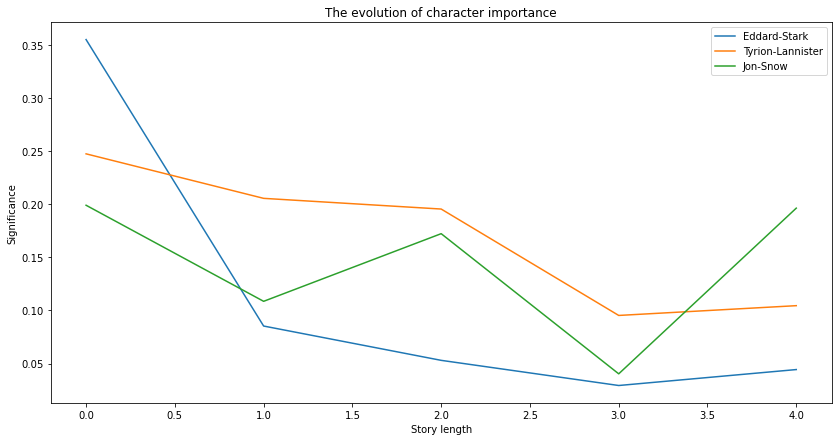

In [28]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
ax=degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot(figsize=(14,7))
plt.title('The evolution of character importance') 
ax.set_xlabel('Story length')
ax.set_ylabel('Significance')
plt.show()

<a name="stage_6"></a>
## 6. What's up with Stannis Baratheon?
[To the table of contents](#table_of_contents)
<p>We can see that the importance of Eddard Stark dies off as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book.</p>
<p>Now let's look at various other measures like <em>betweenness centrality</em> and <em>PageRank</em> to find important characters in our Game of Thrones character co-occurrence network and see if we can uncover some more interesting facts about this network. Let's plot the evolution of betweenness centrality of this network over the five books. We will take the evolution of the top four characters of every book and plot it.</p>

In [29]:
!pip install decorator==4.3.0
!pip install --user networkx==2.3

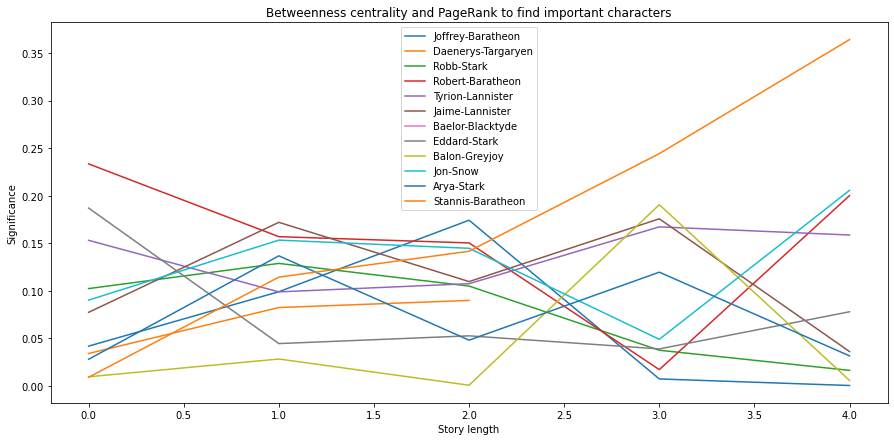

In [30]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
betweenness_evol_df = pd.DataFrame(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
ax=betweenness_evol_df[list_of_char].plot(figsize=(15, 7))
plt.title('Betweenness centrality and PageRank to find important characters') 
ax.set_xlabel('Story length')
ax.set_ylabel('Significance')
plt.show()

<a name="stage_7"></a>
## 7. What does Google PageRank tell us about GoT?
[To the table of contents](#table_of_contents)
<p>We see a peculiar rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.</p>
<p>PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network. Let's look at the importance of characters in the Game of Thrones network according to PageRank. </p>

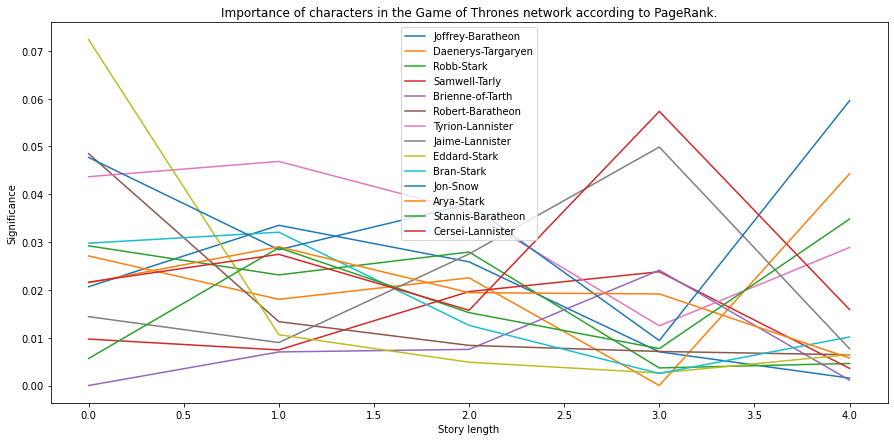

In [31]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
ax=pagerank_evol_df[list_of_char].plot(figsize=(15, 7))
plt.title('Importance of characters in the Game of Thrones network according to PageRank.') 
ax.set_xlabel('Story length')
ax.set_ylabel('Significance')
plt.show()

<a name="stage_8"></a>
## 8. Correlation between different measures
[To the table of contents](#table_of_contents)
<p>Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book according to PageRank. Eddard Stark follows a similar curve but for degree centrality and betweenness centrality: He is important in the first book but dies into oblivion over the book series.</p>
<p>We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three measures so maybe there is a strong correlation between them?</p>
<p>Let's look at the correlation between PageRank, betweenness centrality and degree centrality for the fifth book using Pearson correlation.</p>

In [32]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


<a name="stage_9"></a>
## 9. Conclusion
[To the table of contents](#table_of_contents)
<p>We see a high correlation between these three measures for our character co-occurrence network.</p>
<p>So we've been looking at different ways to find the important characters in the Game of Thrones co-occurrence network. According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these three measures? </p>

In [33]:
# Finding the most important character in the fifth book,
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print('Top character according to pagerank:', p_rank)
print('Top character according to  betweenness centrality:', b_cent)
print('Top character according to  degree centrality:',d_cent)

Top character according to pagerank: Jon-Snow
Top character according to  betweenness centrality: Stannis-Baratheon
Top character according to  degree centrality: Jon-Snow
